## Исследование развлекательного приложения Procrastinate Pro+

Pазвлекательное приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев  терпит убытки. 

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Цель исследования:** Pазобраться в причинах и помочь компании выйти в плюс. 

**Ход исследования:** Изучим следующие впоросы и сделаем выводы:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

## Загрузим данные и подготовим их к анализу

Добавим необходимые библиотеки для работы с данными

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

Считаем CSV-файл с данными с помощью библиотеки pandas и сохраним его в датафрейм.

In [2]:
try:
    visits_info = pd.read_csv('/datasets/visits_info_short.csv',sep=',')
    orders_info = pd.read_csv('/datasets/orders_info_short.csv',sep=',')
    costs_info = pd.read_csv('/datasets/costs_info_short.csv',sep=',')
except:
    visits_info = pd.read_csv('/Users/a0000/Documents/Analitic/All_projects/project6_reklama/datasets/visits_info_short.csv',sep=',')
    orders_info = pd.read_csv('/Users/a0000/Documents/Analitic/All_projects/project6_reklama/datasets/orders_info_short.csv',sep=',')
    costs_info = pd.read_csv('/Users/a0000/Documents/Analitic/All_projects/project6_reklama/datasets/costs_info_short.csv',sep=',')

### Изучим общую информацию

### Таблица visits_info

In [3]:
visits_info.head(2)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35


**Приведем к нижнему регистру названия колонок**

In [4]:
visits_info = visits_info.rename(columns={
    'User Id': 'user_id',
    'Region': 'region',
    'Device': 'device',
    'Channel': 'channel',
    'Session Start': 'session_start',
    'Session End': 'session_end'
})

In [5]:
visits_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
print(f'Количество дубликатов в таблице visits_info: {visits_info.duplicated().sum()}')

Количество дубликатов в таблице visits_info: 0


**Приведем нужный тип данных для Session Start и Session End**

In [7]:
visits_info['session_start'] = pd.to_datetime(visits_info['session_start'])

In [8]:
visits_info['session_end'] = pd.to_datetime(visits_info['session_end'])

In [9]:
visits_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


### Таблица orders_info

In [10]:
orders_info.head(2)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99


**Приведем к нижнему регистру названия колонок**

In [11]:
orders_info = orders_info.rename(columns={
    'User Id': 'user_id',
    'Event Dt': 'event_dt',
    'Revenue': 'revenue'
})

In [12]:
orders_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
print(f'Количество дубликатов в таблице orders_info: {orders_info.duplicated().sum()}')

Количество дубликатов в таблице orders_info: 0


**Приведем нужный тип данных для Event Dt**

In [14]:
orders_info['event_dt'] = pd.to_datetime(orders_info['event_dt'])

In [15]:
orders_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


### Таблица costs_info_short

In [16]:
costs_info.head(2)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1


**Приведем к нижнему регистру названия колонок**

In [17]:
costs_info = costs_info.rename(columns={
    'dt': 'dt',
    'Channel': 'channel',
    'costs': 'costs'
})

In [18]:
costs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [19]:
print(f'Количество дубликатов в таблице costs_info: {costs_info.duplicated().sum()}')

Количество дубликатов в таблице costs_info: 0


**Приведем нужный тип данных для Event Dt**

In [20]:
costs_info['dt'] = pd.to_datetime(costs_info['dt']).dt.date

In [21]:
costs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Промежуточный вывод:** 
- В данных пропусков и дубликатов не обнаружено
- Тип данных во всех колонках исправлен и приведен к соотвествующим значению
- Название колонок приведены к нижнему регистру

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии

### Функции для вычисления значений метрик

**Функция get_profiles() — для создания профилей пользователей:**

In [22]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


**Функция get_retention() — для подсчёта Retention Rate:**

Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулись, то есть воспользовались продуктом или услугой, в последующие периоды.


In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция get_conversion() — для подсчёта конверсии:**

In [24]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция get_ltv() — для подсчёта LTV:**

LTV - это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. 

CAC - это стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент. В сущности, CAC — это инвестиции в маркетинг.

ROI - это окупаемость инвестиций. В экономике одного покупателя эта метрика показывает, на сколько процентов LTV превысил CAC. Ещё говорят: на сколько процентов «окупились» клиенты.

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Зададим функции для построения графиков

**Функция filter_data() — для сглаживания данных:**

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**Функция plot_retention() — для построения графика Retention Rate:**

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Функция plot_conversion() — для построения графика конверсии:**

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Функция plot_ltv_roi — для визуализации LTV и ROI:**

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [30]:
profiles = get_profiles(
    sessions=visits_info,
    orders=orders_info,
    events=pd.DataFrame(),  # В нашем случае нет данных о событиях, поэтому используем пустой DataFrame
    ad_costs=costs_info,
    event_names=[]  # Список событий, если есть
)

# Определение минимальной и максимальной даты привлечения пользователей
min_date = profiles['first_ts'].min()
max_date = profiles['first_ts'].max()

print(f"Минимальная дата привлечения: {min_date}")
print(f"Максимальная дата привлечения: {max_date}")

Минимальная дата привлечения: 2019-05-01 00:00:41
Максимальная дата привлечения: 2019-10-27 23:59:04


In [31]:
profiles.head(3)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000


**Промежуточный вывод:** Мы составили профили пользователей и определили минимальную дату привлечения: `2019-05-01 00:00:41` и максимальную дата привлечения: `2019-10-27 23:59:04`, результаты соответсвуют описанию.

### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [32]:
country_stats = profiles.groupby('region').agg(
    total_users = ('user_id','count'),
    paying_users = ('payer','sum')
)

country_stats['share_paying'] = (country_stats['paying_users'] / country_stats['total_users'] * 100).round(2)
country_stats.sort_values(by='share_paying',ascending=False).reset_index()

,region,total_users,paying_users,share_paying
0,United States,100002,6902,6.90
1,Germany,14981,616,4.11
2,UK,17575,700,3.98
3,France,17450,663,3.80


**Промежуточный вывод:** Из таблицы мы видим, что пользователи приходят из стран United States, UK, France, Germany, а больше всего платящих пользователей приходится на `United States` - это 6.9% от общего количества пользователей этой страны.

### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [33]:
device_stats = profiles.groupby('device').agg(
    total_users = ('user_id','count'),
    paying_users = ('payer','sum')
)

device_stats['share_paying'] = (device_stats['paying_users'] / device_stats['total_users'] * 100).round(2)
device_stats.sort_values(by='share_paying',ascending=False).reset_index()

,device,total_users,paying_users,share_paying
0,Mac,30042,1912,6.36
1,iPhone,54479,3382,6.21
2,Android,35032,2050,5.85
3,PC,30455,1537,5.05


**Промежуточный вывод:** Из таблицы мы видим, что клиенты пользуются следующими устройствами: iPhone ,Android ,PC , Mac. Платящие пользователи предпочитают больше всего устройство `Mac` - это 6.36% и `iPhone` - это 6.21% от общего числа владельцев данных гаджетов.

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [34]:
channel_stats = profiles.groupby('channel').agg(
    total_users=('user_id', 'count'),
    paying_users=('payer', 'sum')
)

# Вычисление доли платящих пользователей
channel_stats['share_paying'] = channel_stats['paying_users'] / channel_stats['total_users'] * 100

channel_stats.sort_values(by='share_paying',ascending=False).reset_index().round(2)

,channel,total_users,paying_users,share_paying
0,FaceBoom,29144,3557,12.20
1,AdNonSense,3880,440,11.34
2,lambdaMediaAds,2149,225,10.47
3,TipTop,19561,1878,9.60
4,RocketSuperAds,4448,352,7.91
5,WahooNetBanner,8553,453,5.30
6,YRabbit,4312,165,3.83
7,MediaTornado,4364,156,3.57
8,LeapBob,8553,262,3.06
9,OppleCreativeMedia,8605,233,2.71


**Промежуточный вывод:** Мы получили 11 рекламных источников, из которых больше всего платящих пользователей приходится на FaceBoom - 12.2% , AdNonSense - 11.34% , lambdaMediaAds - 10.47% и TipTop - 9.6%

## Маркетинг

### Посчитаем общую сумму расходов на маркетинг.

In [35]:
profiles['acquisition_cost'].sum().round(2)

105497.3

**Промежуточный вывод:** Общая сумма расходов на маркетинг состовляет 105497.3

### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [36]:
profiles.groupby('channel').agg(
    marketing_expenditure = ('acquisition_cost','sum')
).sort_values(by = 'marketing_expenditure', ascending = False).reset_index()

,channel,marketing_expenditure
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


**Промежуточный вывод:** Больше всего на маркетинг тратят в следущих источниках: TipTop - 54751.30 ,FaceBoom - 32445.60, WahooNetBanner - 5151, а на источник organic вовсе не выделяется средств.

### Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

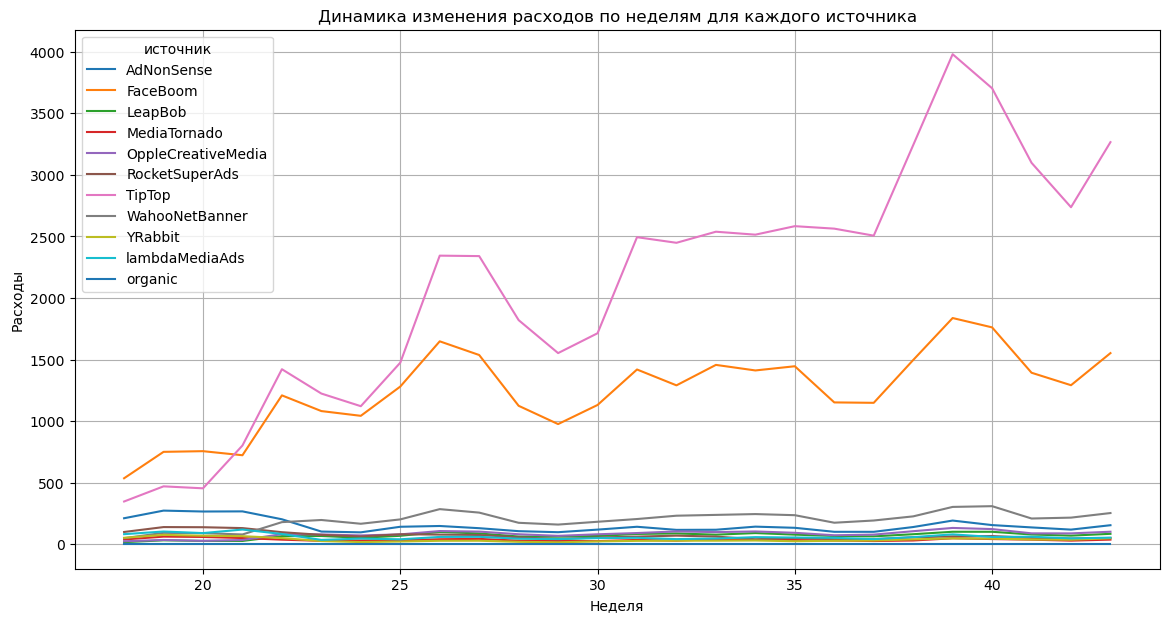

In [37]:
profiles['dt'] = pd.to_datetime(profiles['dt'])

# Добавление колонки с номером недели
profiles['week'] = profiles['dt'].dt.isocalendar().week

# Группировка данных по неделям и источникам
weekly_costs = profiles.groupby(['week', 'channel']).agg({'acquisition_cost': 'sum'}).reset_index()

# Построение графика
plt.figure(figsize=(14, 7))
for channel in weekly_costs['channel'].unique():
    channel_data = weekly_costs[weekly_costs['channel'] == channel]
    plt.plot(channel_data['week'], channel_data['acquisition_cost'], label=channel)

plt.title('Динамика изменения расходов по неделям для каждого источника')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.legend(title='источник')
plt.grid(True)
plt.show()


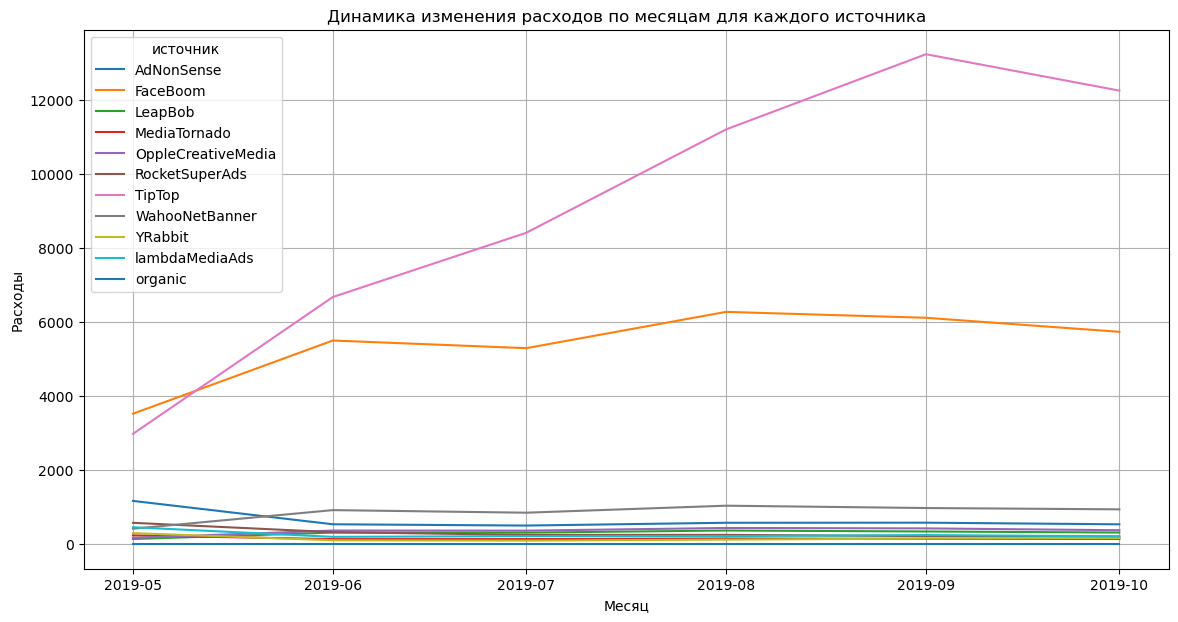

In [38]:
month_costs = profiles.groupby(['month', 'channel']).agg({'acquisition_cost': 'sum'}).reset_index()

# Преобразование месяца в формат datetime для корректного отображения
month_costs['month'] = pd.to_datetime(month_costs['month'])

# Построение графика

plt.figure(figsize=(14,7))

for channel in month_costs['channel'].unique():
    channel_data = month_costs[month_costs['channel'] == channel]
    plt.plot(channel_data['month'],channel_data['acquisition_cost'], label=channel)
    
plt.title('Динамика изменения расходов по месяцам для каждого источника')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(title='источник')
plt.grid(True)
plt.show()

**Промежуточный вывод:** По графикам распределения недели и месяца видно, что расходы в источниках TipTop и FaceBoom с каждой неделей и  месяцем увеличиваются. Траты на другие источники примерно одинаковы и стабильны, но среди них выделяется источник WahooNetBanner, в этот источник идет больше вложений.

### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [39]:
cac_per_channel = profiles.groupby('channel').agg(
    total_acquisition_cost=('acquisition_cost', 'sum'),
    total_users=('user_id', 'nunique')
).reset_index()


cac_per_channel['CAC'] = cac_per_channel['total_acquisition_cost'] / cac_per_channel['total_users']


cac_per_channel = cac_per_channel.sort_values(by='CAC', ascending=False).reset_index(drop=True).round(2)


cac_per_channel

,channel,total_acquisition_cost,total_users,CAC
0,TipTop,54751.30,19561,2.80
1,FaceBoom,32445.60,29144,1.11
2,AdNonSense,3911.25,3880,1.01
3,lambdaMediaAds,1557.60,2149,0.72
4,WahooNetBanner,5151.00,8553,0.60
5,RocketSuperAds,1833.00,4448,0.41
6,OppleCreativeMedia,2151.25,8605,0.25
7,YRabbit,944.22,4312,0.22
8,MediaTornado,954.48,4364,0.22
9,LeapBob,1797.60,8553,0.21


**Промежуточный вывод:** Мы посчитали сколько в среднем стоило привлечение одного пользователя для каждого источника. Самые дорогие пользователи были привлечены из источников TipTop и FaceBoom со средней ценой в 2.8 и 1.11 за одного пользователя.

##  Оценим окупаемость рекламы

#### Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

**Вызовем функцию get_ltv() и исключим organic, так как на эту компанию не выделялось средств**

In [40]:
profiles = profiles[profiles['channel'] != 'organic']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles, 
    purchases=orders_info, 
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14,
    dimensions=[],   
    ignore_horizon=False  
)

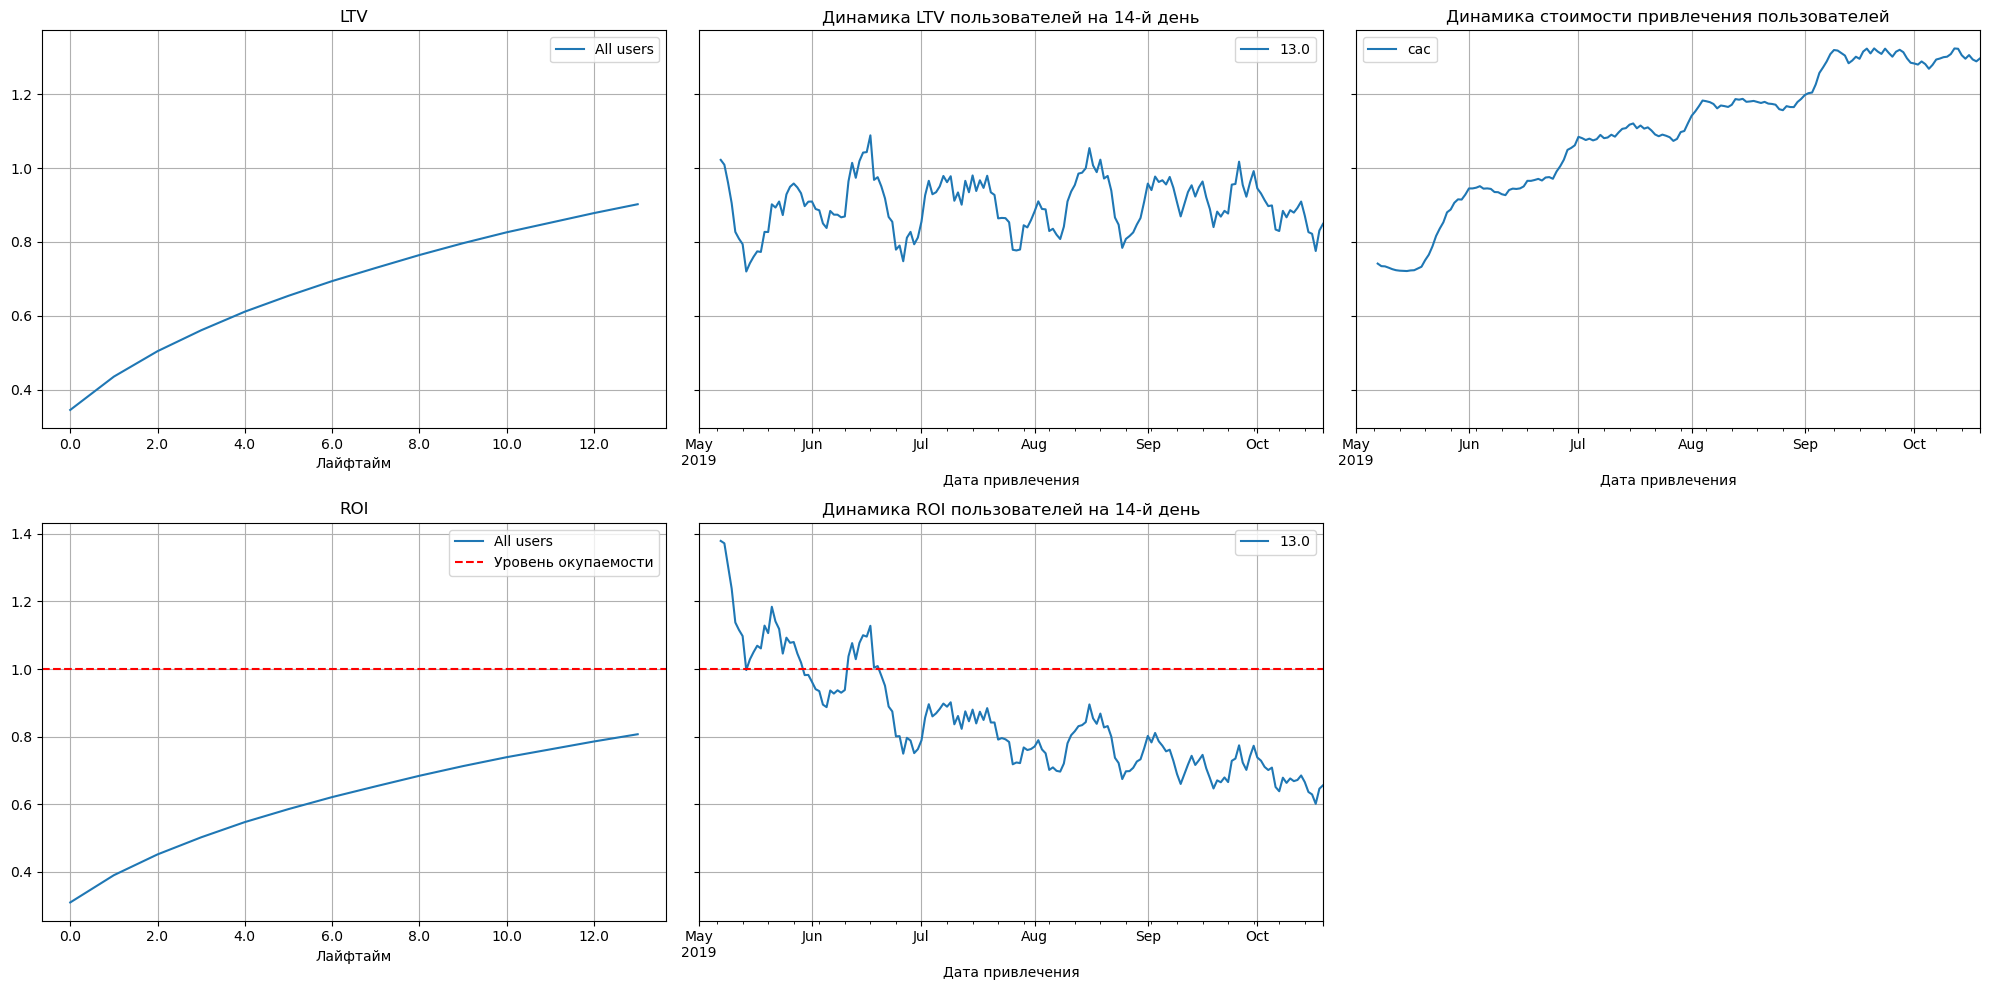

In [41]:
plot_ltv_roi(
    ltv=ltv_grouped,         
    ltv_history=ltv_history, 
    roi=roi_grouped,         
    roi_history=roi_history, 
    horizon=14,              
    window=7                 
)

**Промежуточный вывод:** 

По графикам можно сделать такие выводы:

- График LTV растет постепенно с увеличением лайфтайма пользователей, на 14 день значение состовляет около 0.9 , это значение указывывает на то, что пользователи продолжают приносить доход в течении этого времени, что положительно сказывается на окупаемости рекламы.
- График Динамики LTV на 14 день показывает колебания в течении всего периода, в среднем значение стабильно.
- График димамики CAC показывает рост с мая по сентябрь и далее стабилизируется на высоком уровне, рост CAC может говорить нам о том, что в этих месяцах увеличивается конкуренция или реклама оказывается неэффективной.
- График ROI так же растет с увеличением лайфтайма пользователей, но остается ниже уровня окупаемости, это означает, что реклама не окупается в течении двух недель.
- График динамики ROI на 14 день, показывает, что значение ROI падает ниже еденицы в июле, что говорит нам о том, что реклама была менее эффективна в этот и следующие периоды.


### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

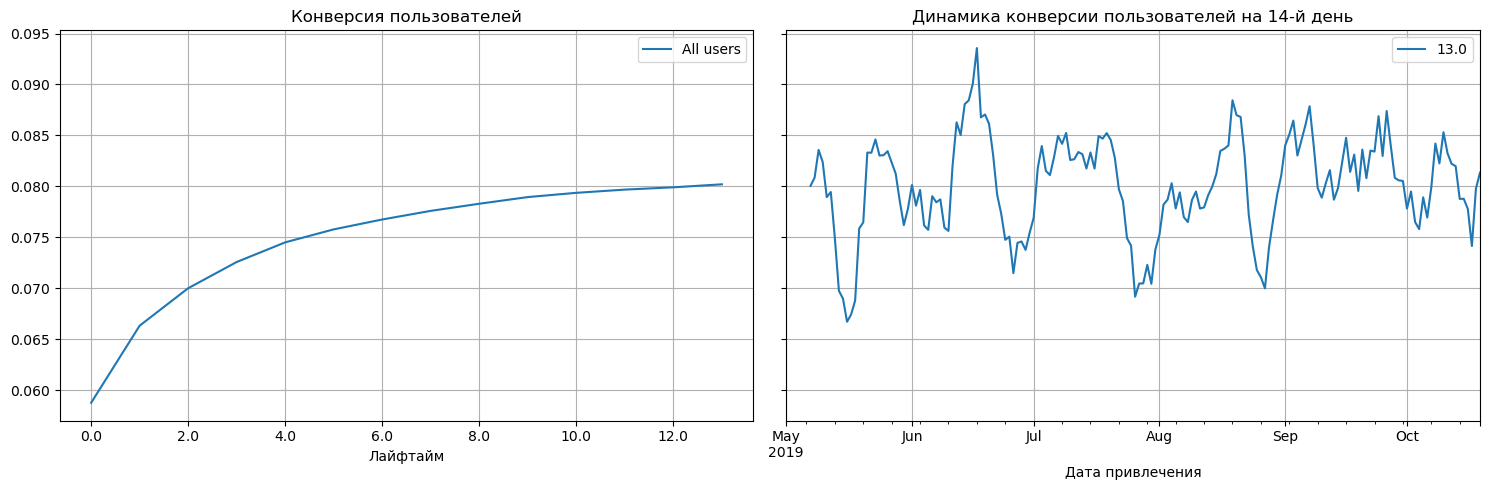

In [42]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles, 
    purchases=orders_info,  
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14, 
    dimensions=[]  
)

plot_conversion(conversion=conversion_grouped, conversion_history=conversion_history, horizon=14,window=7) 


**Промежуточный вывод:** 
- Конверсия растет с 6% до 8% на протяжении 14 дней, это означает что с течением времени все больше пользоватлей совершают покупки. 
- График динамики показывает как менялось конверсия пользователей на 14 день в разные месяцы, по графику наблюдаются значительные колебания, которые могут быть вызваны разными фактами, например сезонностью или не эффективностью рекламных команий.

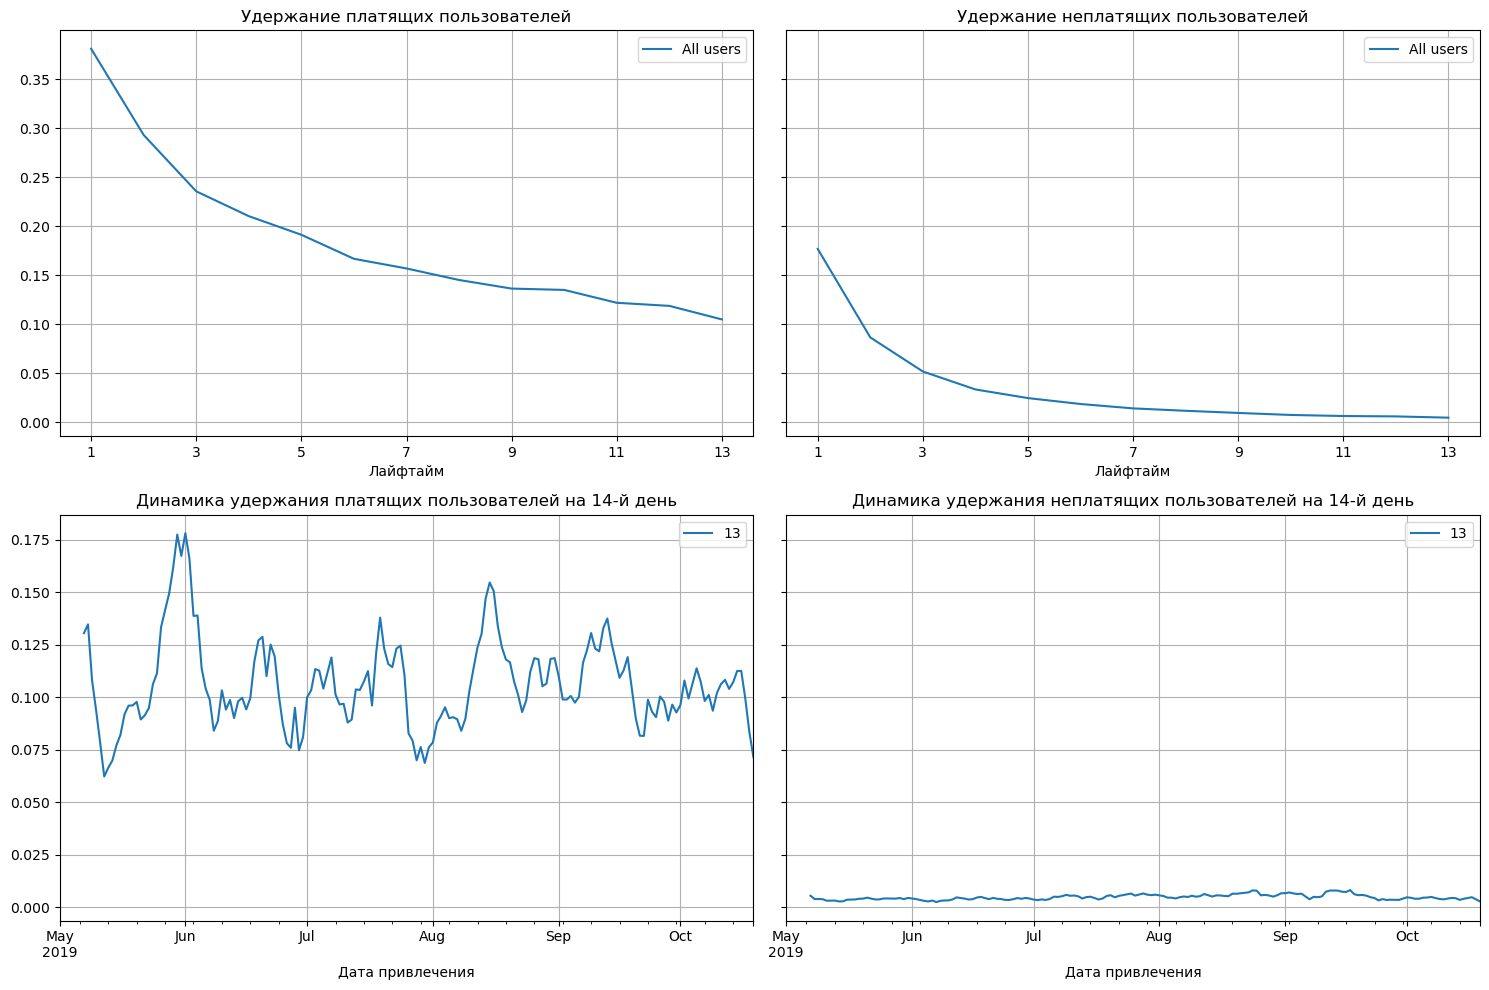

In [43]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles=profiles, 
    sessions=visits_info, 
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14, 
    dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon=14,window=7) 

**Промежуточный вывод:** 
- Удержание платящих пользователей постепенно снижается с увеличением лайфтайма, в первый день это значение держиться на отметке 37%, но это число быстро снижается и к 14-му дню составляет около 10%. Это указывает на значительное падение интереса или активности среди платящих пользователей.
- Удержание неплатящих пользователей в перый день это значение состовляет чуть более 15%, и ужд спустя 9 дней это значение близится к нулю.
- Динамикка удержания платящих пользователей показывают большую интенсивность, это указывает на колебания интереса пользователей или на влияние внешних факторов, таких как рекламные кампании или сезонные колебания спроса.
- Динамика удержания неплатящих пользователей показывает что значение остается на стабильно низком уровне практически около нуля, это подтверждает, что большинство неплатящих пользователей быстро теряет интерес к продукту и не возвращаются.

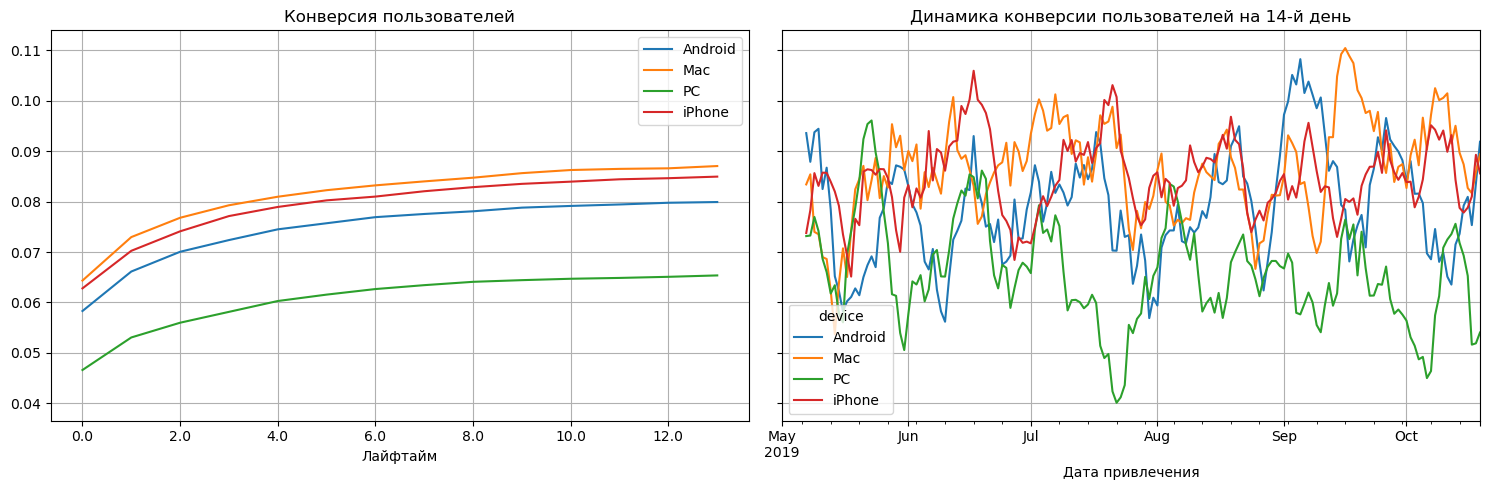

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles, 
    purchases=orders_info,  
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14, 
    dimensions=['device']  
)

plot_conversion(conversion=conversion_grouped, conversion_history=conversion_history, horizon=14,window=7) 


**Промежуточный вывод:** 
- Самая низкая конверсия у пользователей PC. 
- График динамики показывает как менялось конверсия пользователей на 14 день в разные месяцы, по графику наблюдаются значительные колебания, которые могут быть вызваны разными фактами, например сезонностью или не эффективностью рекламных команий. В среднем у всех оиднаковые значения, кроме PC, эти пользователи имеют очень силтные колебания, в частности в июле касаются нуля, позже вырастают, но остаются на низком уровне относительно других

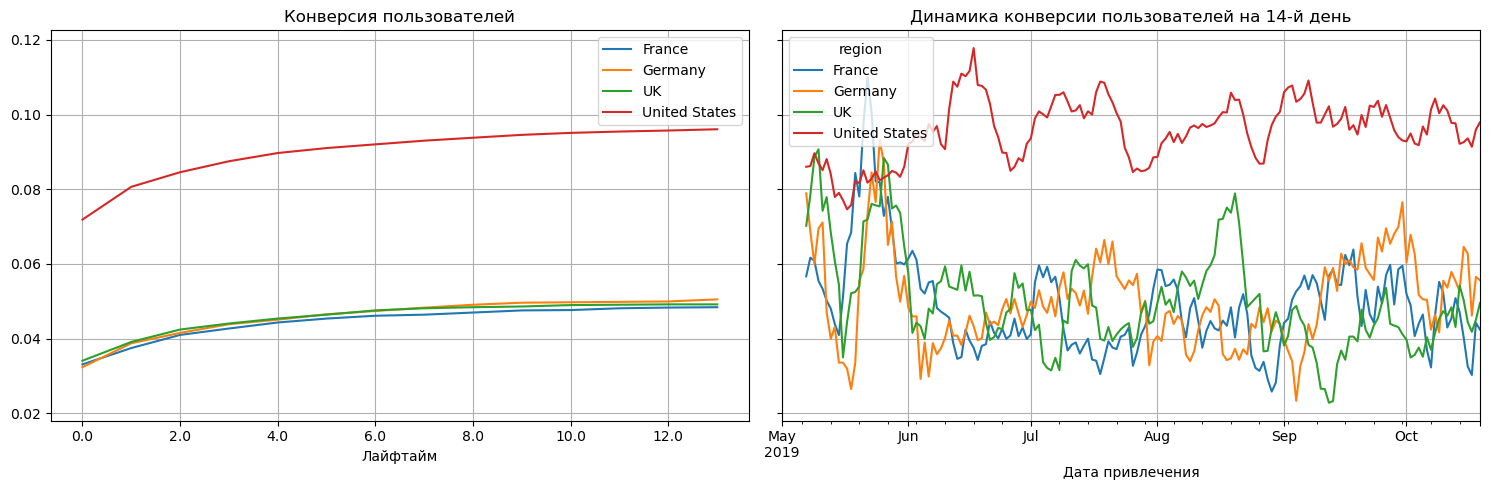

In [45]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles, 
    purchases=orders_info,  
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14, 
    dimensions=['region']  
)

plot_conversion(conversion=conversion_grouped, conversion_history=conversion_history, horizon=14,window=7) 


**Промежуточный вывод:** 
- Самая высокая конверсия у пользователей из USA. 
- График динамики показывает как менялось конверсия пользователей на 14 день в разные месяцы, по графику наблюдаются высокая динамика у пользователей из USA, а остальные пользователи имели пик в мае, но после пошли на снижение и в среднем имеют одинаковые результаты в диазоне от 3% до 6%

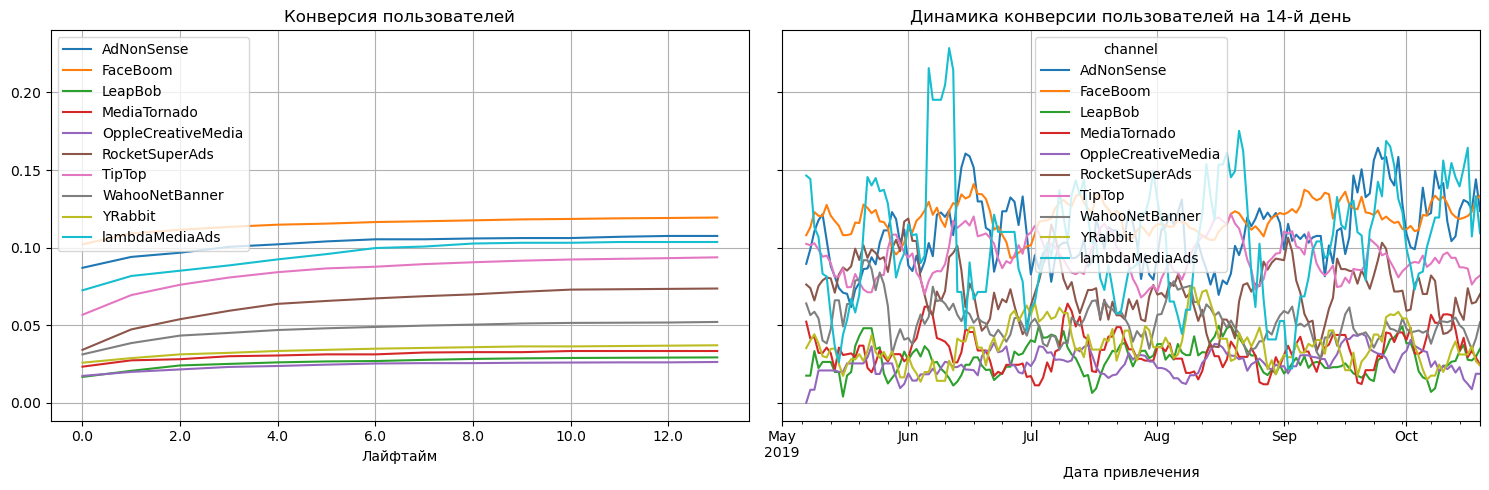

In [46]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles, 
    purchases=orders_info,  
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14, 
    dimensions=['channel']  
)

plot_conversion(conversion=conversion_grouped, conversion_history=conversion_history, horizon=14,window=7) 


**Промежуточный вывод:** 
- Самая высокая конверсия у источника FaceBoom. 
- График динамики показывает как менялось конверсия пользователей на 14 день в разные месяцы, по графику наблюдаются высокая динамика у источника lambdaMediaAds, AdNonSense и FaceBoom

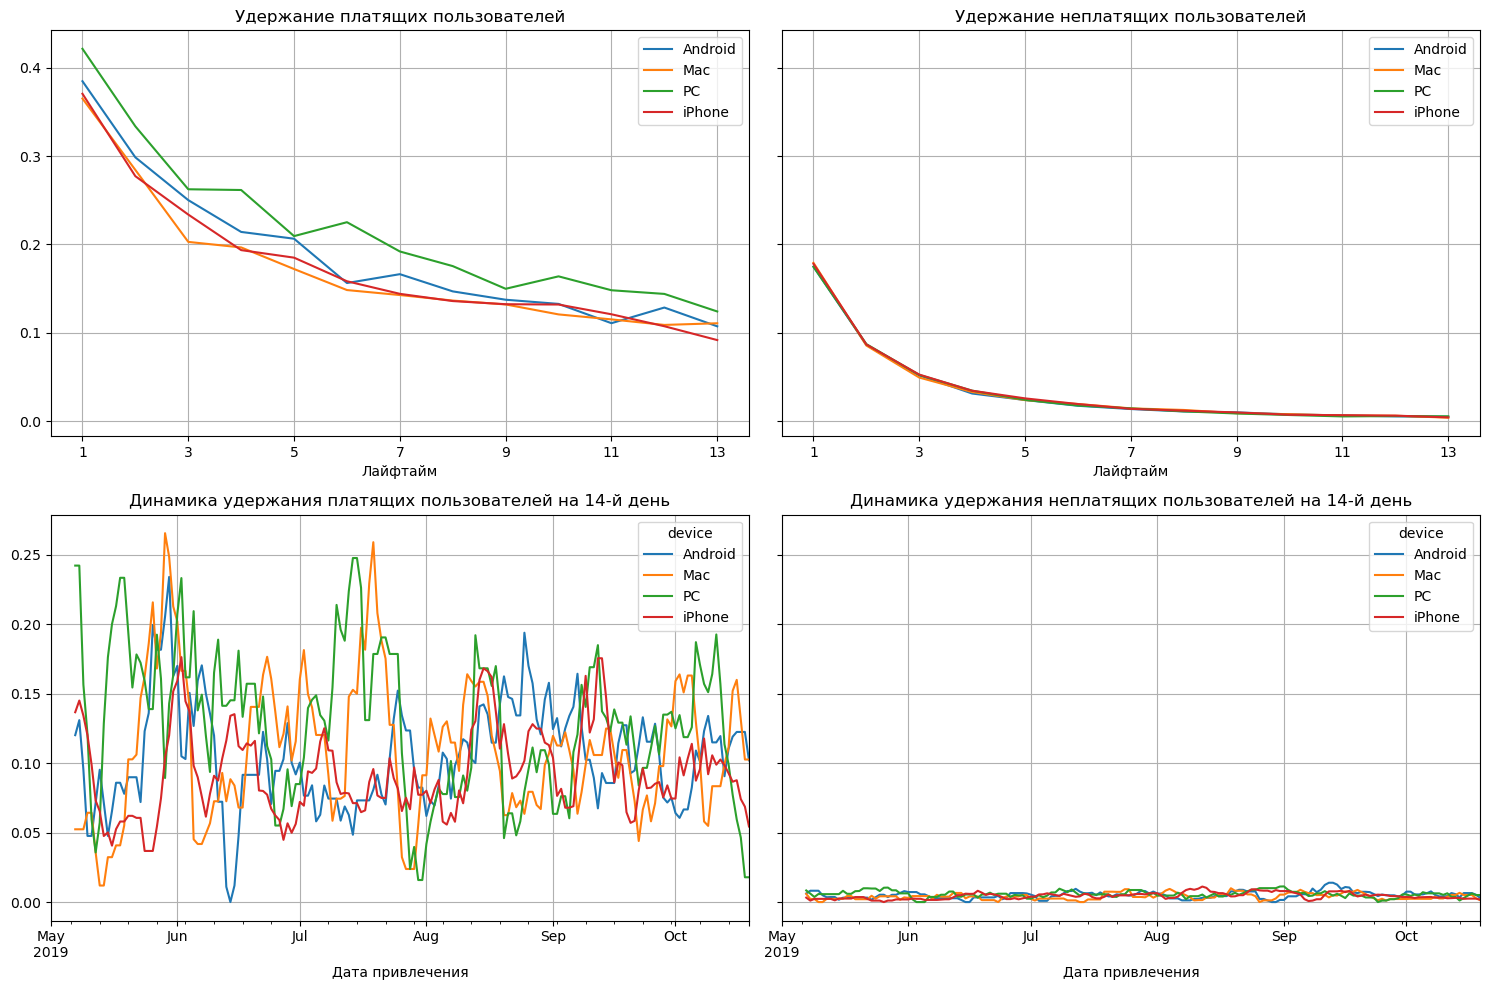

In [47]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles=profiles, 
    sessions=visits_info, 
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14, 
    dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon=14,window=7) 

**Промежуточный вывод:** 
- Удержание платящих пользователей постепенно снижается с увеличением лайфтайма, пользователи PC и Android показывают более высокий уровень удержания, нежели iPhone и Mac
- Удержание неплатящих пользователей для всех одинаково и близится к нулю
- Динамикка удержания платящих пользователей -  пользователи PC и Mac показывают большую интесивность, с мая по август был больщой интерес, после в с среднем удержание становиться одинаковым для Android, Mac, PC. У пользавателей iPhone самое плохое удержание среди конкуретов, но переодически появляются точки роста. 
- Динамика удержания неплатящих пользователей показывает что значение остается на стабильно низком уровне практически около нуля, это подтверждает, что большинство неплатящих пользователей быстро теряет интерес к продукту и не возвращаются.

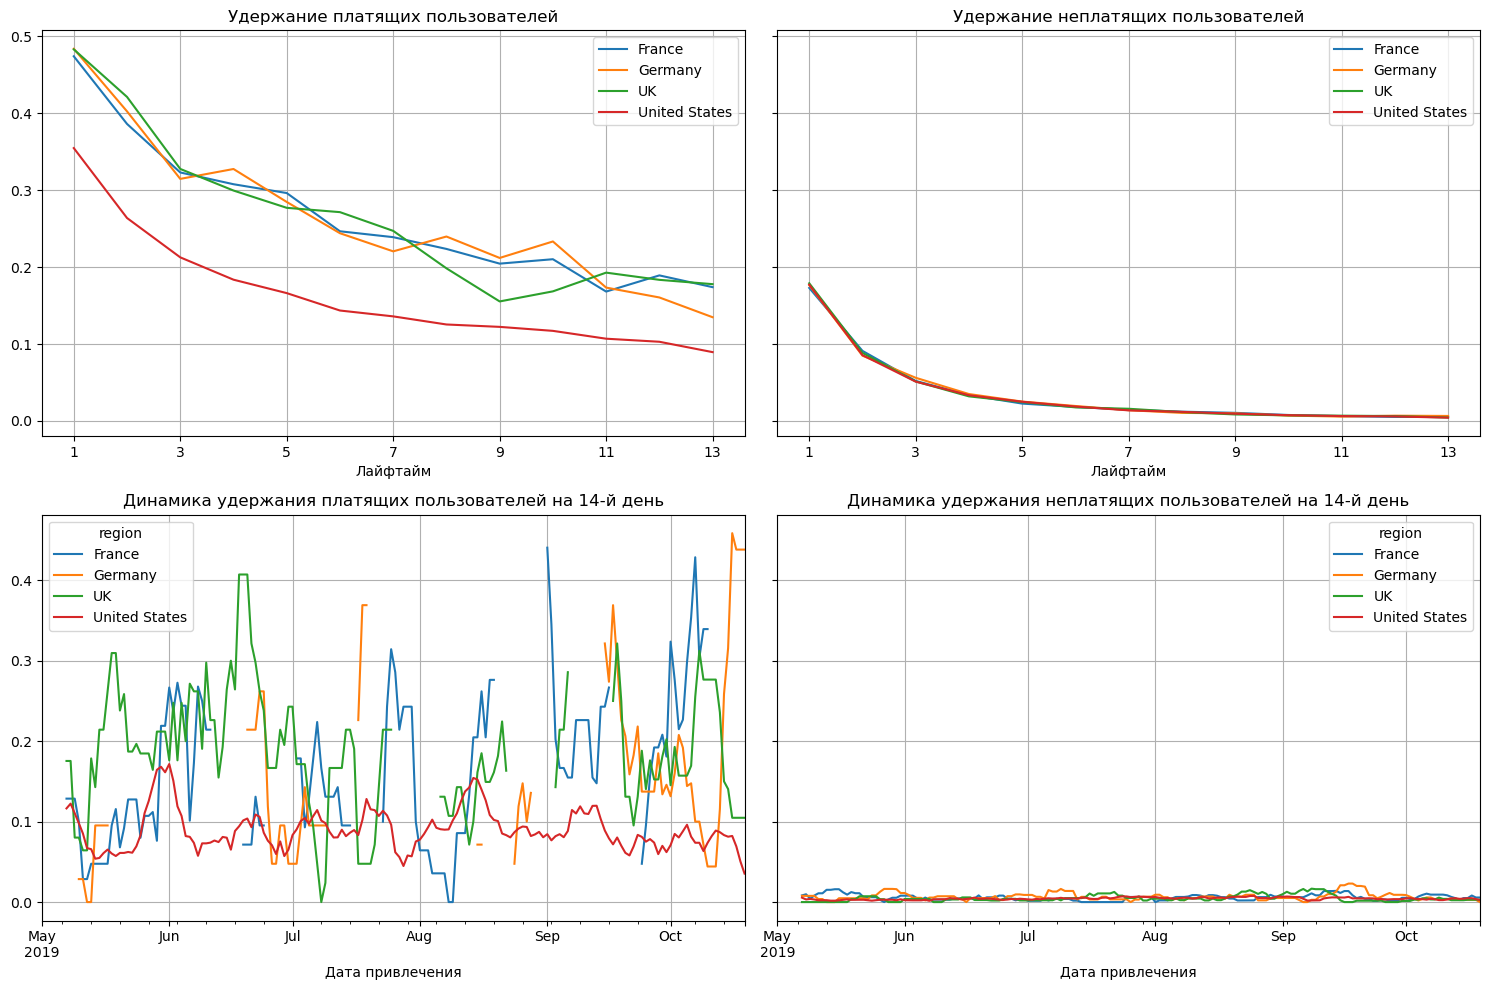

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles=profiles, 
    sessions=visits_info, 
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14, 
    dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon=14,window=7) 

**Промежуточный вывод:** 
- Удержание платящих пользователей постепенно снижается с увеличением лайфтайма, пользователи из USA имеют значительно низкое удержание, относительно конкурентов из других стран.
- Удержание неплатящих пользователей для всех одинаково и близится к нулю
- Динамикка удержания платящих пользователей -  пользователи из France, Germany, UK показывают большую интесивность. У пользавателей из USA самое низкое удержание среди конкуретов.
- Динамика удержания неплатящих пользователей показывает что значение остается на стабильно низком уровне практически около нуля, это подтверждает, что большинство неплатящих пользователей быстро теряет интерес к продукту и не возвращаются.

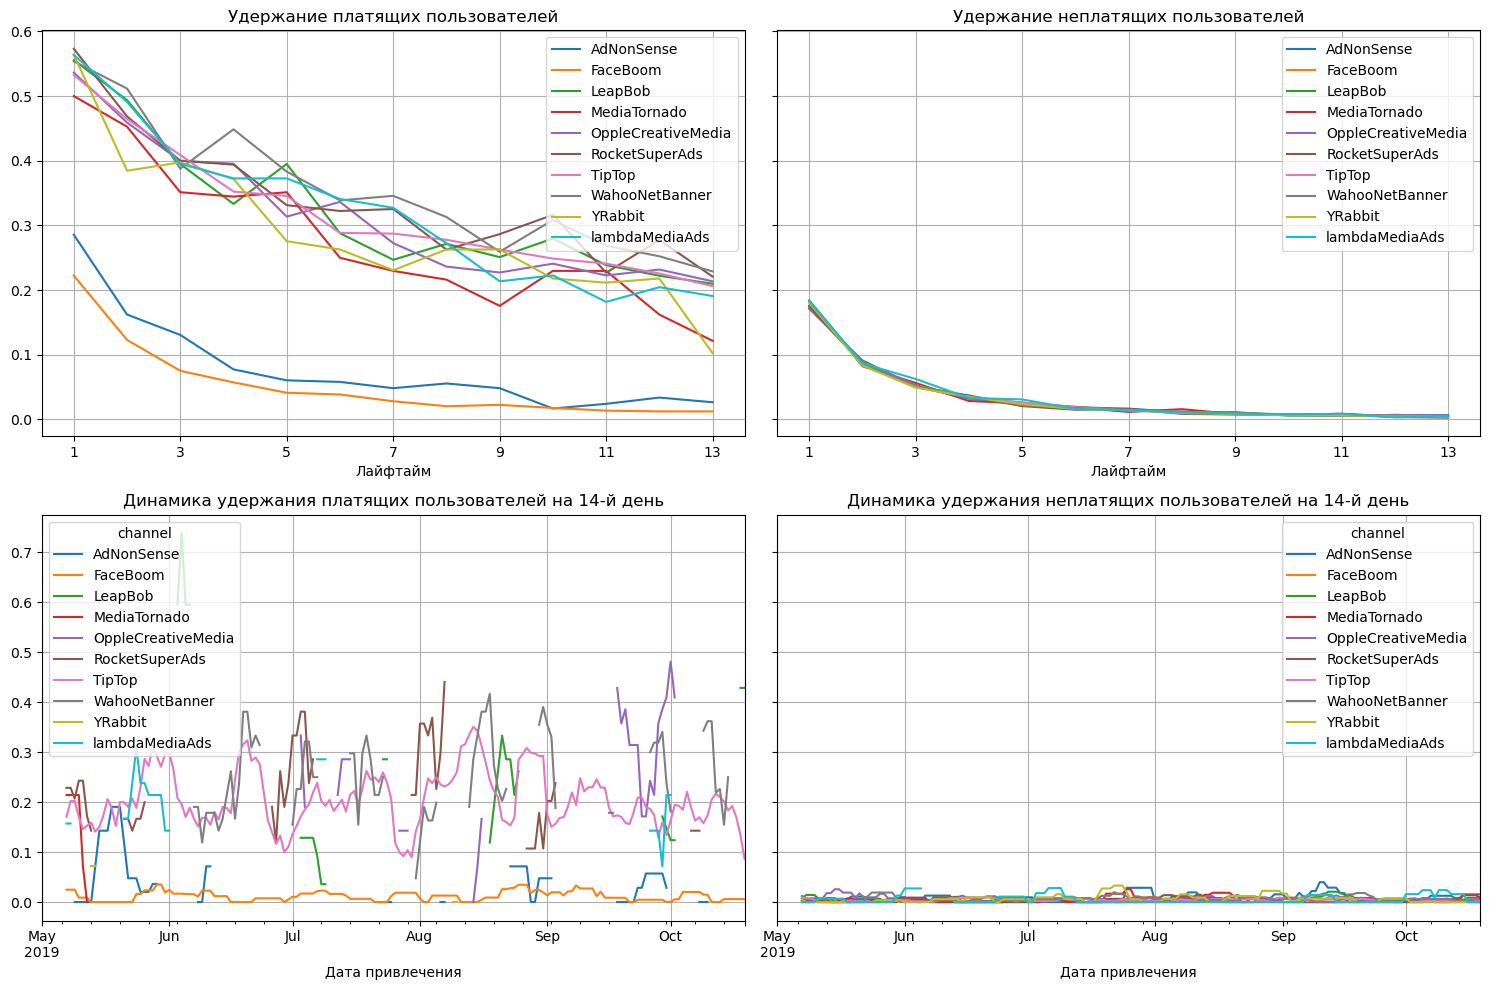

In [49]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles=profiles, 
    sessions=visits_info, 
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14, 
    dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon=14,window=7) 

**Промежуточный вывод:** 
- Удержание платящих пользователей постепенно снижается с увеличением лайфтайма, источники AdNonSense и FaceBoom имеют самое низкое удержание стремящиеся к нулю уже с 9 дня
- Удержание неплатящих пользователей для всех одинаково и близится к нулю
- Динамикка удержания платящих пользователей -  имеет сильные колебания, а FaceBoom колеблется в диапозоне нуля с самого начала.
- Динамика удержания неплатящих пользователей показывает что значение остается на стабильно низком уровне практически около нуля, это подтверждает, что большинство неплатящих пользователей быстро теряет интерес к продукту и не возвращаются.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

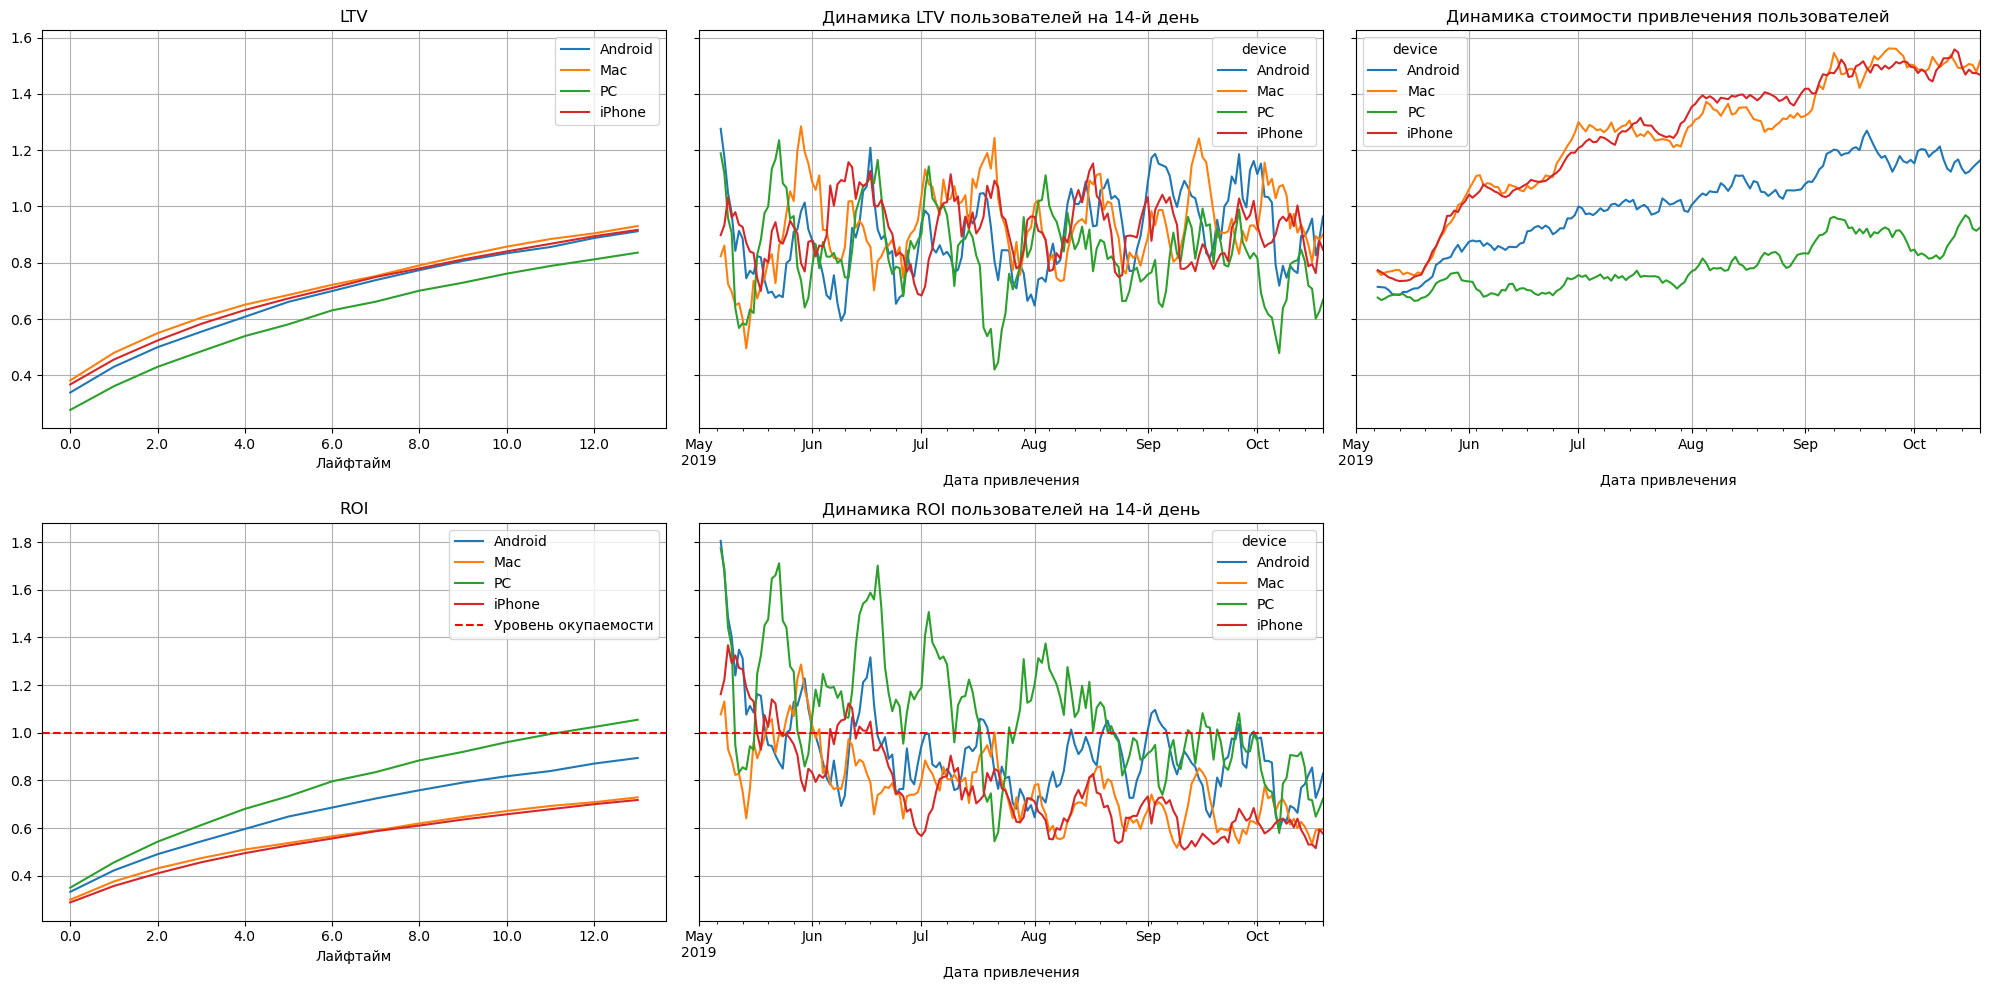

In [50]:

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles, 
    purchases=orders_info, 
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14,
    dimensions=['device'],   
    ignore_horizon=False  
)

plot_ltv_roi(
    ltv=ltv_grouped,         
    ltv_history=ltv_history, 
    roi=roi_grouped,         
    roi_history=roi_history, 
    horizon=14,              
    window=7                 
)

**Промежуточный вывод:**
- График LTV растет с увеличением лайфтайма пользователей.
- Динамика LTV пользователей показывает колебания значений в течение анализируемого периода, в среднем у всех значения равны, кроме пользователей PC, они имеют несколько довольно сильных просадок.
- Динамика стоимости привлечения новых пользователей показывает, что самыми дорогими явялются пользователи Mac и iPhone.
- График ROI показывает, что окупаются только пользователи PC 
- Динамика ROI показывает, что пользователи PC перестают окупаться в августе, в то время как остальные начиная с мая.

### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

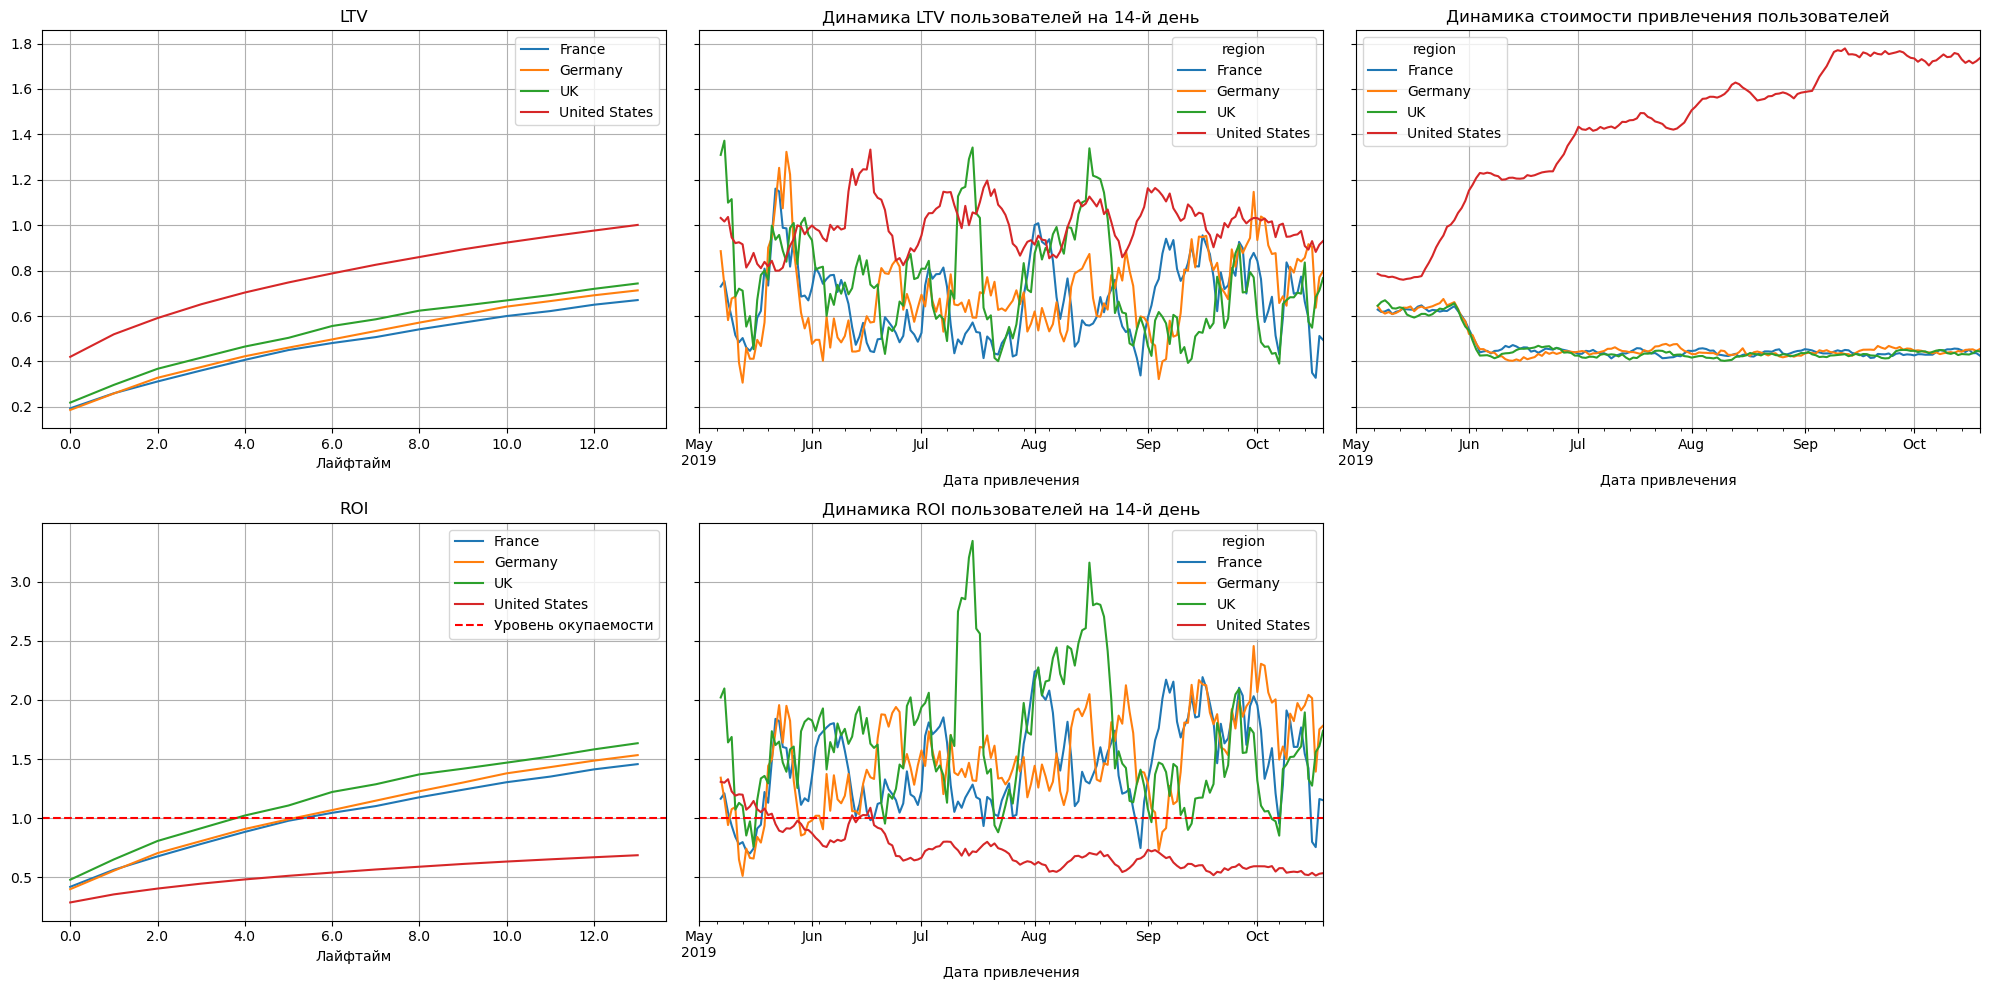

In [51]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles, 
    purchases=orders_info, 
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14,
    dimensions=['region'],   
    ignore_horizon=False  
)

plot_ltv_roi(
    ltv=ltv_grouped,         
    ltv_history=ltv_history, 
    roi=roi_grouped,         
    roi_history=roi_history, 
    horizon=14,              
    window=7                 
)

**Промежуточный вывод:**
- График LTV растет с увеличением лайфтайма пользователей, высокий LTV наблюдается у пользователей USA
- Динамика LTV пользователей показывает колебания значений в течение анализируемого периода, больше всего LTV у пользователей USA, что указывает на возможное увеличение доходов от этих пользователей, пользователи из UK показывают сильное влияние сезонности.
- Динамика стоимости привлечения пользователей говорит о том, что самыми дорогими являются пользователи USA, а остальные страны держатся на одном уровне.
- График ROI показывает, что пользователи всех стран кроме USA, окупаются на шестой день, а пользователи USA нет. 
- График динамики ROI показывает, что в июле у пользователей USA происходит  снижение окупаемости, которое больше не возращается выше линии затрат, остальные пользователи на протяжении всего эскперимента показывают стабильный результат, но пользователи из UK имеют высокие точки роста и быстрые падения, что может говорить о том, что есть проблемы либо в сезонном плане или проблемы с приложением.  

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

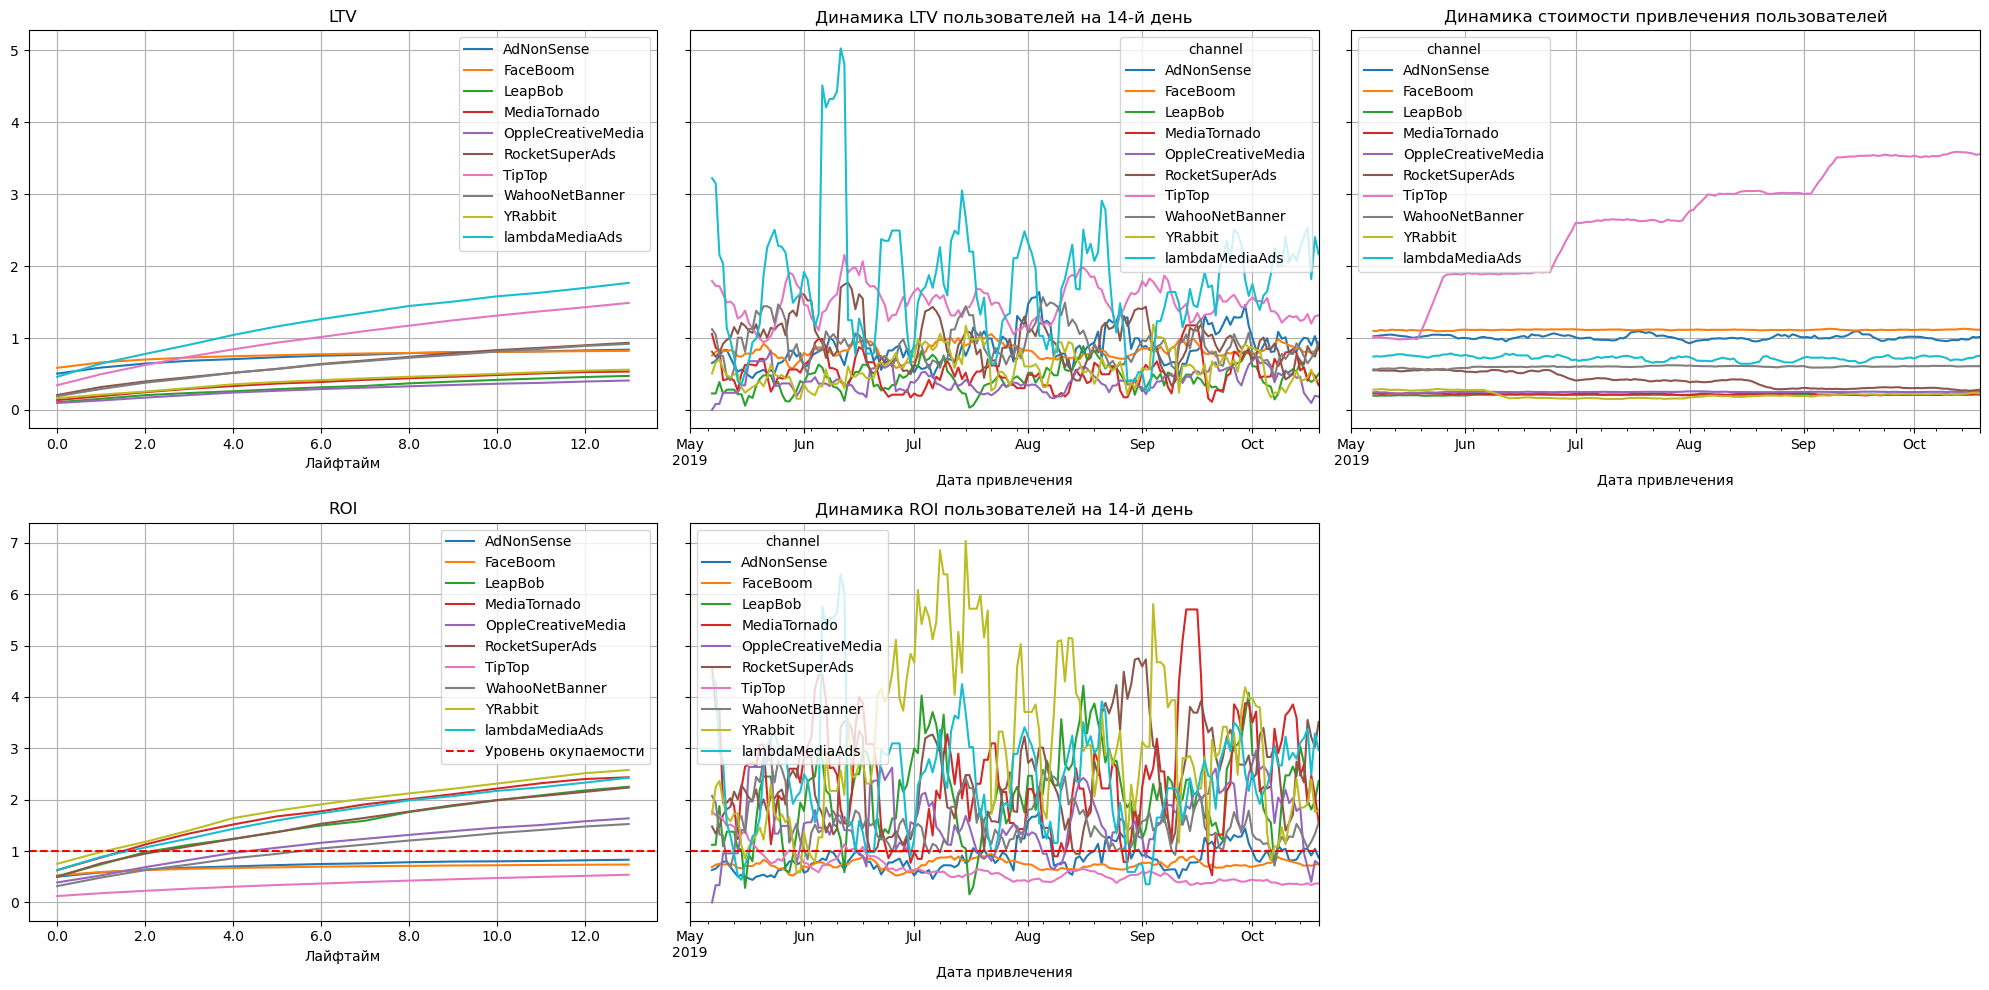

In [52]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles, 
    purchases=orders_info, 
    observation_date=pd.to_datetime('2019-11-01'), 
    horizon_days=14,
    dimensions=['channel'],   
    ignore_horizon=False  
)

plot_ltv_roi(
    ltv=ltv_grouped,         
    ltv_history=ltv_history, 
    roi=roi_grouped,         
    roi_history=roi_history, 
    horizon=14,              
    window=7                 
)

**Промежуточный вывод:**
- На графике LTV наблюдается высокий LTV для компаний lambdaMediaAds и TipTop 
- Динамика LTV пользователей показывает колебания значений в течение анализируемого периода, больше всего LTV у  AdNonSense, что указывает на возможное увеличение доходов от этой компании.
- Динамика стоимости привлечения пользователей говорит о том, что самым дорогим являются источник TipTop.
- График ROI показывает, что пользователи  FaceBoom, TipTop, AdNonSense не окупаются. 
- График динамики ROI показывает, что все кампании кроме FaceBoom, TipTop на протяжении всего периода не преодолевают уровня окупаемости вовсе. 

## Вывод


1. Окупается ли реклама в целом?

На основе предоставленных данных и анализа графиков LTV и ROI:

ROI: График ROI показывает, что реклама не окупается в течение двух недель, так как ROI остаётся ниже 1. Это говорит о том, что реклама не приносит достаточного дохода для покрытия своих затрат в заданный период.
LTV: Несмотря на то что LTV растет с увеличением лайфтайма пользователей, значения на 14-й день не достигают уровня окупаемости, что указывает на долгосрочную приростную стоимость, но не на краткосрочную окупаемость рекламы.
Таким образом, реклама, направленная на привлечение пользователей, в целом не окупается в рассматриваемый период времени.

2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Устройства:

Mac и iPhone: Эти устройства имеют высокие значения LTV, но также и высокие значения CAC, что делает их менее эффективными в краткосрочной перспективе. Высокие затраты на привлечение пользователей с этих устройств могут не компенсироваться за короткий срок.
PC: Пользователи PC имеют низкий CAC и окупаемость в краткосрочной перспективе, что делает их более эффективными.
Страны:

США: Высокий LTV, но также высокие затраты на привлечение пользователей, что может затруднить окупаемость рекламы в краткосрочном периоде.
Франция и Германия: Низкий LTV и нестабильные показатели ROI, что указывает на менее эффективную рекламу в этих регионах.
Рекламные каналы:

В ходе анализа различных рекламных каналов было выявлено, что FaceBoom и TipTop демонстрируют низкие значения ROI, что указывает на неэффективность рекламы в этих источниках. Помимо низкого ROI, FaceBoom также показал один из худших результатов по показателю Lifetime Value (LTV) и крайне высокой стоимости привлечения, что дополнительно подтверждает нецелесообразность инвестиций в этот канал.

RocketSuperAds, YRabbit, lambdaMediaAds, MediaTornado показали себя как более перспективные каналы. Они имеют хорошие  показатели  удержания и демонстрирует устойчивый рост по сравнению с другими каналами. Рекомендуется рассмотреть возможность увеличения бюджетов на эти источники, так как их эффективность и потенциал для увеличения прибыли выше.

3. Чем могут быть вызваны проблемы окупаемости?

Высокие затраты на привлечение пользователей: В случаях с Mac и iPhone, а также в некоторых рекламных каналах и странах, затраты на привлечение пользователей выше, чем доход, который они приносят за короткий срок.
Низкий LTV в некоторых регионах и устройствах: Если пользователи из определённых регионов или на определённых устройствах не генерируют достаточно дохода, это может привести к плохой окупаемости рекламы.
Неэффективные рекламные каналы: Некоторые каналы могут быть менее эффективными, что приводит к низкому ROI и неокупаемости рекламы.
Сезонные колебания: В некоторых случаях может наблюдаться высокая сезонность или временные колебания, которые влияют на краткосрочную окупаемость рекламы.

4. Вывод

Реклама, направленная на привлечение пользователей, в целом не окупается в рассматриваемый период времени, поскольку ROI остаётся ниже 1, а значения LTV на 14-й день не достигают уровня окупаемости. Проблемы окупаемости могут быть вызваны высокими затратами на привлечение пользователей, низким LTV в некоторых регионах и на определённых устройствах, а также неэффективностью рекламных каналов. Для улучшения окупаемости необходимо оптимизировать рекламные расходы, сосредоточиться на наиболее эффективных каналах и регионах, а также улучшить удержание и конверсию пользователей.

Таким образом, для достижения наилучших результатов и оптимизации рекламных затрат, целесообразно снизить инвестиции в FaceBoom и TipTop, и перераспределить часть бюджета в сторону RocketSuperAds, YRabbit, lambdaMediaAds, MediaTornado.
